In [1]:
# standard libraries
import numpy as np #numpy warnings may be safely ignored, known issue.
import pandas as pd
from collections import defaultdict
from math import * # Used for the haversine/distance calculations
import datetime as dt 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.cluster import KMeans

# for optimizations
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Make an empty DefaultDict
# fill dictionary {year: station data}
# build hierarchal dataframe using dictionary

# Example of data location
# https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/2010/NiceRide_station_2010.csv

nr_dict = defaultdict()
for x in [2010 + x for x in range(8)] :
    nr_dict[x] = pd.read_csv("https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/" \
                             +str(x)+"/NiceRide_station_"+str(x)+".csv")
nr_station = pd.concat(nr_dict)

In [3]:
# Extracting the most robust year/data set from the total
nr_station_2017 = nr_station.loc[(2017),:]

In [4]:
nr_station_2017.tail()

,Terminal,Station,Latitude,Longitude,Ndocks
196,30199,Hidden Falls Park,44.907001,-93.191432,19
197,30201,Elwood Ave N & Oak Park Ave N,44.987160,-93.301944,15
198,30202,Mill City Quarter,44.980500,-93.261800,23
199,30203,W 50th Street & W Minnehaha Pkwy,44.912125,-93.298552,23
200,30204,NE Central Ave & NE 14th Ave,45.002526,-93.247162,15


## First load in matrix that has the arc distance of each station comparatively.

In [5]:
distance = pd.read_csv("https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/2017/"\
                        "distance_matrix_2017.csv",index_col=0)

In [6]:
distance.info()
distance.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 30000 to 30204
Columns: 201 entries, 30000 to 30204
dtypes: float64(201)
memory usage: 317.2 KB


,30000,30001,30002,30003,30004,30005,30006,30007,30008,30009,...,30194,30195,30196,30197,30198,30199,30201,30202,30203,30204
30000,0.000000,2.500883,1.466835,2.471107,1.267481,0.304709,1.308283,1.034074,2.514716,0.970652,...,1.792963,1.091036,1.346930,1.120933,0.944879,6.253741,2.223943,0.397380,5.431379,1.301979
30001,2.500883,0.000000,1.062434,4.686271,2.976568,2.642299,2.790346,2.456370,1.899581,1.775162,...,1.178669,1.412001,1.362179,1.653395,1.579928,3.813231,4.358510,2.467683,4.825362,3.331634
30002,1.466835,1.062434,0.000000,3.641812,1.967888,1.648298,1.808542,1.448112,1.612348,0.969751,...,0.977645,0.389264,0.738530,0.920689,0.633325,4.788731,3.322895,1.405513,4.753667,2.470703
30003,2.471107,4.686271,3.641812,0.000000,1.746448,2.564107,1.971116,2.246913,3.718459,3.438583,...,4.236012,3.364533,3.782869,3.585482,3.330279,8.096739,0.361928,2.300340,5.491521,2.988440
30004,1.267481,2.976568,1.967888,1.746448,0.000000,1.530430,0.242315,0.521591,2.057588,2.053101,...,2.722854,1.761634,2.284861,2.171021,1.813986,6.364891,1.399569,0.899256,4.474715,2.429523


In [7]:
# If we wanted to merge our two new dataframes together
# nr_station_2017 = pd.merge(nr_station_2017, distance, left_on='Terminal', right_index=True)

In [8]:
distance_matrix = distance.values

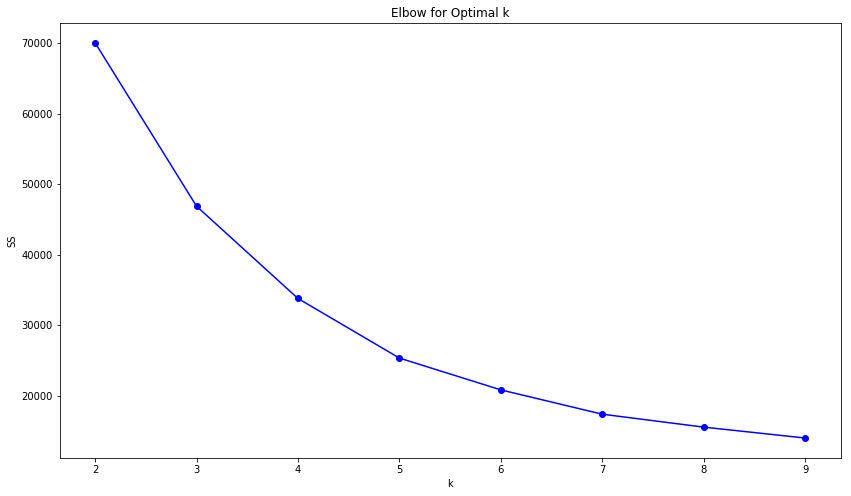

In [9]:
SS = []

# k means determine k
for k in range(2,10) :
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(distance_matrix)

    SS.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(14,8))
plt.plot(range(2,10), SS, 'bo-')
plt.xlabel('k')
plt.ylabel('SS')
plt.title('Elbow for Optimal k')
plt.show()

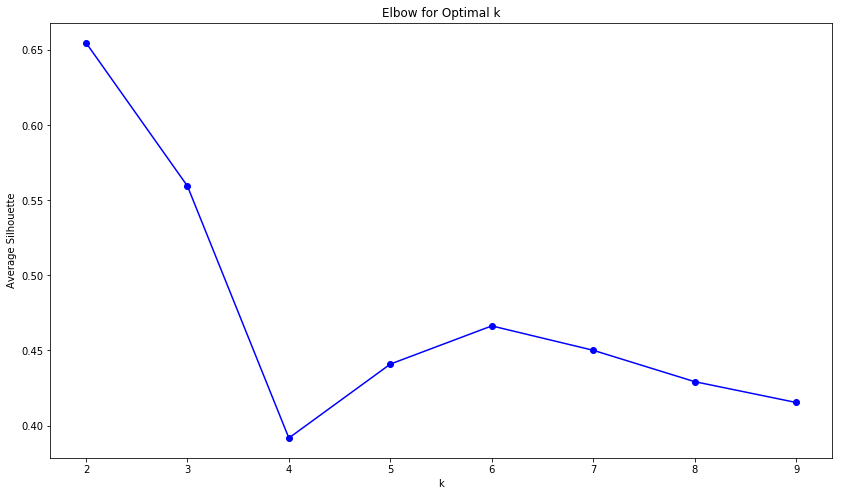

In [10]:
avg_sil = []

#    Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
for k in range(2,10) :
    clusterer = KMeans(n_clusters=k, random_state=24).fit(distance_matrix)
    cluster_labels = clusterer.labels_
    
#    For each k, calculate the average silhouette of observations (avg.sil).
    silhouette_avg = silhouette_score(distance_matrix, cluster_labels)
    avg_sil.append(silhouette_avg)
    

#    Plot the curve of avg.sil according to the number of clusters k.
plt.figure(figsize=(14,8))
plt.plot(range(2,10), avg_sil, 'bo-')
plt.xlabel('k')
plt.ylabel('Average Silhouette')
plt.title('Elbow for Optimal k')
plt.show()

    
#    The location of the maximum (local) is considered as the appropriate number of clusters.
k_value = avg_sil.index(max(avg_sil[4:10])) + 4

In [11]:
k_va

NameError: name 'k_va' is not defined

In [ ]:
# Initialize a new PCA model with a default number of components.
pca = PCA()
pca.fit(distance_matrix)

plt.figure(figsize=[14,8])
plt.xlim(0,12)
plt.plot(range(1,len(pca.explained_variance_)+1), pca.explained_variance_)
plt.xticks(range(0,12,2))
plt.ylabel('PCA Explained variance')
plt.xlabel('Number of PCA dimensions')
plt.show()

In [ ]:
pca_df = pd.DataFrame(PCA(n_components=2).fit_transform(distance_matrix), columns=['x','y'], index=nr_station_2017.index)
pca_df = pd.DataFrame(nr_station_2017.Terminal).join(pca_df)
    # Joins customer names to pca_df containing x-y PCA components
print(pca_df.head())

Optimize to calculate greatest slope change and use that to dynamically decide n_components

In [ ]:
def kmeans_plot(pca_df, distance_matrix, x=4) :
    pca_df['cluster']= KMeans(n_clusters=x).fit(distance_matrix).labels_
    sns.lmplot(x='x', y='y', hue='cluster', data=pca_df, fit_reg=False, size=5)

In [ ]:
kmeans_plot(pca_df, distance_matrix, k_value)

In [ ]:
pca_df['cluster']= KMeans(n_clusters=k_value).fit(distance_matrix).labels_
six_nr_clusters = pd.merge(nr_station_2017, pca_df, left_on='Terminal', right_on='Terminal')

In [ ]:
# Stations based on coordinates and clusters
sns.lmplot(x='Longitude', y='Latitude', hue='cluster', data=six_nr_clusters, fit_reg=False, size=7)
ax = plt.gca()
ax.set_title('Six Clusters')

In [ ]:
#print(centers[:,0])
#print(centers[:,1])

#six_clusters = KMeans(n_clusters=6).fit(distance_matrix)
#centers = np.array(six_clusters.cluster_centers_)
#plt.scatter(centers[:,0], centers[:,1], marker="*", color='r')

# uilding the models
pca_model = PCA(n_components=2).fit_transform(distance_matrix)
six_kmeans = KMeans(n_clusters=6).fit(pca_model)

pca_df['cluster']= six_kmeans.labels_
centers = six_kmeans.cluster_centers_


In [ ]:
six_nr_clusters.head()

In [ ]:
# Read in the ridership database for year (2017) and build as pandas dataframe
rides_df = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/SethDKelly/NiceRideMN/master/Nice_Ride_data/2017/NiceRide_trip_history_2017.csv"))

In [ ]:
rides_df.info()
rides_df.head()

## Data prep/cleaning

In [ ]:
# Adjusting the start and end date columns to datetime

rides_df['Start_date'] = rides_df['Start_date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
rides_df['End_date'] = rides_df['End_date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

## splitting based on (non-)member

In [ ]:
member = rides_df[rides_df['account'] == "Member"]
casual = rides_df[rides_df['account'] != "Member"]

In [ ]:
station_member = member[['Start_id', 'duration']]
station_member = station_member.groupby(['Start_id']).count()
station_member = station_member.rename(columns={'duration':'m_count'})

In [ ]:
casual_member = casual[['Start_id', 'duration']]
casual_member = casual_member.groupby(['Start_id']).count()
casual_member = casual_member.rename(columns={'duration':'c_count'})

## Merging the data to our clustered dataframe

In [ ]:
six_nr_clusters = pd.merge(six_nr_clusters, station_member, left_on='Terminal', right_index=True)
six_nr_clusters = pd.merge(six_nr_clusters, casual_member, left_on='Terminal', right_index=True)

In [ ]:
temp = defaultdict()
for x in np.unique(six_nr_clusters.cluster.values) :
    temp['cluster_'+str(x)] = six_nr_clusters.groupby(six_nr_clusters.cluster==x)[['m_count', 'c_count']].describe()
cluster_describe = pd.concat(temp)
cluster_describe

In [ ]:
six_nr_clusters.head()

In [ ]:
# This will find member mean rides per terminal per cluster
cluster_summary = pd.DataFrame(columns=['terminals', 'tot_rides', 'm_rides', 'c_rides', 'mem_term', \
                                        'cas_term', 'pct_mem_rides'],\
                    index=['Cluster_'+str(x) for x in np.unique(six_nr_clusters.cluster.values)])

for x in np.unique(six_nr_clusters.cluster.values) :
    #build arrays by cluster to work with
    member_array = six_nr_clusters[six_nr_clusters.cluster == x].m_count.values
    casual_array = six_nr_clusters[six_nr_clusters.cluster == x].c_count.values
    total_array = np.sum(member_array) + np.sum(casual_array)
    
    cluster_summary.loc['Cluster_'+str(x), 'terminals'] = len(member_array)
    cluster_summary.loc['Cluster_'+str(x), 'tot_rides'] = member_array.sum() + casual_array.sum()
    cluster_summary.loc['Cluster_'+str(x), 'm_rides'] = member_array.sum()
    cluster_summary.loc['Cluster_'+str(x), 'c_rides'] = casual_array.sum()
    cluster_summary.loc['Cluster_'+str(x), 'mem_term'] = member_array.sum()/len(member_array)
    cluster_summary.loc['Cluster_'+str(x), 'cas_term'] = casual_array.sum()/len(casual_array)
    cluster_summary.loc['Cluster_'+str(x), 'pct_mem_rides'] = (member_array.sum()/total_array.sum())*100

## Cluster summaries looking at:
 * Total rides:
     * Member
     * Casual
 * Total terminals:
     * Member mean rides per terminal
     * Casual mean rides per terminal
 * Percent member riders of each cluster

In [ ]:
cluster_summary
# possible to add arc-distance (Lat-Long) square miles

In [ ]:
# Stations based on coordinates and clusters
sns.lmplot(x='Longitude', y='Latitude', hue='cluster', data=six_nr_clusters, fit_reg=False, size=7)

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    '''
    Haversine definition: will calculate the distance between two points
    using the latitude and longitude of each point.
    '''
    miles_constant = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    mi = miles_constant * c
    return mi

In [ ]:
def find_length(df, clus):
    '''
    Takes in a dataframe with a column ('cluster') that contains whole number values of clusters,
    two seperate columns containing lat/long values and finds rectangular area 
    of cluster area based on max/min long/lat values
    '''

    max_l = df[df['cluster'] == clus]['Longitude'].max()
    min_l = df[df['cluster'] == clus]['Longitude'].min()
        
    return (max_l - min_l)

In [ ]:
def find_width(df, clus):
    '''
    Takes in a dataframe with a column ('cluster') that contains whole number values of clusters,
    two seperate columns containing lat/long values and finds rectangular area 
    of cluster area based on max/min long/lat values
    '''

    max_w = df[df['cluster'] == clus]['Latitude'].max()
    min_w = df[df['cluster'] == clus]['Latitude'].min()
        
    
    return (max_w - min_w)

In [ ]:
def find_center(df, clus):
    
    max_l = df[df['cluster'] == clus]['Longitude'].max()
    min_l = df[df['cluster'] == clus]['Longitude'].min()
    center_long = (max_l - min_l)/2 + min_l
    
    max_w = df[df['cluster'] == clus]['Latitude'].max()
    min_w = df[df['cluster'] == clus]['Latitude'].min()
    center_lat = (max_w - min_w)/2 + min_w
    
    return (center_long, center_lat)

In [ ]:
def area(df, clus):
    
    return find_width(df,clus) * find_length(df,clus)

In [ ]:
def circle_radius(df,clus):
    
    long1, lat1 = find_center(df,clus)
    
    lat2 = df[df['cluster'] == clus]['Latitude'].max()
    long2 = df[df['cluster'] == clus]['Longitude'].max()
    
    diff_long = long2-long1
    diff_lat = lat2-lat1
    if diff_lat > diff_long:
        return diff_lat
    else:
        return diff_long

In [ ]:
max_w = six_nr_clusters[six_nr_clusters['cluster'] == 2]['Latitude'].max()
min_w = six_nr_clusters[six_nr_clusters['cluster'] == 2]['Latitude'].min()
max_l = six_nr_clusters[six_nr_clusters['cluster'] == 2]['Longitude'].max()
min_l = six_nr_clusters[six_nr_clusters['cluster'] == 2]['Longitude'].min()
print(max_w, min_w)
print(max_l, min_l)

In [ ]:
for x in range(6):
    radius = circle_radius(six_nr_clusters,x)
    print(radius)

In [ ]:
long,lat = find_center(six_nr_clusters, 2)
print(long,lat)

In [ ]:
plt.figure(figsize=[14,8])
plt.xlim([-93.35,-93.05])
plt.ylim([44.88,45.05])

for x in range(6):
    long,lat = find_center(six_nr_clusters, x)
    radius = circle_radius(six_nr_clusters,x)
    circle = plt.Circle((long,lat), radius, fill=False)
    
    ax = plt.gca()
    ax.cla
    ax.scatter(x=six_nr_clusters[six_nr_clusters.cluster == x]['Longitude'].values,\
                    y=six_nr_clusters[six_nr_clusters.cluster == x]['Latitude'].values,\
                    marker='o')
    ax.plot(long,lat, marker='*', c='black')
    ax.add_artist(circle)
    
plt.show()

## Intra/Trans-cluster travel
 * This can be split be (non-)membership too

In [ ]:
# Build a data frame with start terminal as indices, end terminal as columns filled with zeros
station_ids = nr_station_2017.Terminal.values
travel_df = pd.DataFrame(columns = station_ids, index = station_ids).fillna(0)

In [ ]:
start = rides_df['Start_id'].values
end = rides_df['End_id'].values

for x in range(len(rides_df['Start_id'].values)) :
    travel_df.loc[start[x], end[x]] += 1

In [ ]:
from sklearn.preprocessing import normalize

travel_matrix = travel_df.values
normed_travel = normalize(travel_matrix, axis=1, norm='l1')

In [ ]:
clus_array = six_nr_clusters.cluster.values
term_cluster_pair = {}
for x in range(len(station_ids)) :
    term_cluster_pair[station_ids[x]] = clus_array[x]

In [ ]:
'''
Build this better using lambda mapping and dictionaries
'''
travel_to = pd.DataFrame(columns=['to_0', 'to_1', 'to_2', 'to_3', 'to_4', 'to_5'], \
                              index=station_ids).fillna(0)

for x in station_ids :
    if term_cluster_pair[x] == 0:
        travel_to['to_0'] += (travel_df[x].values)
    elif term_cluster_pair[x] == 1:
        travel_to['to_1'] += (travel_df[x].values)
    elif term_cluster_pair[x] == 2:
        travel_to['to_2'] += (travel_df[x].values)
    elif term_cluster_pair[x] == 3:
        travel_to['to_3'] += (travel_df[x].values)
    elif term_cluster_pair[x] == 4:
        travel_to['to_4'] += (travel_df[x].values)
    elif term_cluster_pair[x] == 5:
        travel_to['to_5'] += (travel_df[x].values)

We're going to transpose the travel_matrix. This will give us instead of a data frame with start terminal as indices, end terminal as columns filled with zeros (from-to), a data frame with end terminals as indices and start terminals as columns (to-from).

The purpose of this is to show how the clusters interact with each other.

In [ ]:
from_matrix = travel_matrix.transpose(1,0)

In [ ]:
from_df = pd.DataFrame(from_matrix, columns=station_ids, index=station_ids)

In [ ]:
'''
Build this better using lambda mapping and dictionaries
'''

travel_from = pd.DataFrame(columns=['from_0', 'from_1', 'from_2', 'from_3', 'from_4', 'from_5'], \
                              index=station_ids).fillna(0)

for x in station_ids :
    if term_cluster_pair[x] == 0:
        travel_from['from_0'] += (from_df[x].values)
    elif term_cluster_pair[x] == 1:
        travel_from['from_1'] += (from_df[x].values)
    elif term_cluster_pair[x] == 2:
        travel_from['from_2'] += (from_df[x].values)
    elif term_cluster_pair[x] == 3:
        travel_from['from_3'] += (from_df[x].values)
    elif term_cluster_pair[x] == 4:
        travel_from['from_4'] += (from_df[x].values)
    elif term_cluster_pair[x] == 5:
        travel_from['from_5'] += (from_df[x].values)

Build a super dataframe containing all the extra features we've created

In [ ]:
six_nr_clusters = pd.merge(six_nr_clusters, travel_to, left_on='Terminal', right_index=True)
six_nr_clusters = pd.merge(six_nr_clusters, travel_from, left_on='Terminal', right_index=True)
six_nr_clusters.head()

In [ ]:
intra_to_summary = pd.DataFrame(columns=['clus0', 'clus1', 'clus2','clus3', 'clus4', 'clus5', 'pct_intra'],\
                    index=['Cluster_'+str(x) for x in np.unique(six_nr_clusters.cluster.values)]).fillna(0)

for x in np.unique(six_nr_clusters.cluster.values) :
    intra_to_summary.loc['Cluster_'+str(x)]['clus0'] = six_nr_clusters[six_nr_clusters.cluster == x]['to_0'].values.sum()
    intra_to_summary.loc['Cluster_'+str(x)]['clus1'] = six_nr_clusters[six_nr_clusters.cluster == x]['to_1'].values.sum()
    intra_to_summary.loc['Cluster_'+str(x)]['clus2'] = six_nr_clusters[six_nr_clusters.cluster == x]['to_2'].values.sum()
    intra_to_summary.loc['Cluster_'+str(x)]['clus3'] = six_nr_clusters[six_nr_clusters.cluster == x]['to_3'].values.sum()
    intra_to_summary.loc['Cluster_'+str(x)]['clus4'] = six_nr_clusters[six_nr_clusters.cluster == x]['to_4'].values.sum()
    intra_to_summary.loc['Cluster_'+str(x)]['clus5'] = six_nr_clusters[six_nr_clusters.cluster == x]['to_5'].values.sum()
    intra_to_summary.loc['Cluster_'+str(x)]['pct_intra'] = (intra_to_summary.loc['Cluster_'+str(x)]['clus'+str(x)]\
                                                               / intra_to_summary.loc['Cluster_'+str(x),:].values.sum()) *100

In [ ]:
intra_from_summary = pd.DataFrame(columns=['clus0', 'clus1', 'clus2','clus3', 'clus4', 'clus5', 'pct_intra'],\
                    index=['Cluster_'+str(x) for x in np.unique(six_nr_clusters.cluster.values)]).fillna(0)

for x in np.unique(six_nr_clusters.cluster.values) :
    intra_from_summary.loc['Cluster_'+str(x)]['clus0'] = six_nr_clusters[six_nr_clusters.cluster == x]['from_0'].values.sum()
    intra_from_summary.loc['Cluster_'+str(x)]['clus1'] = six_nr_clusters[six_nr_clusters.cluster == x]['from_1'].values.sum()
    intra_from_summary.loc['Cluster_'+str(x)]['clus2'] = six_nr_clusters[six_nr_clusters.cluster == x]['from_2'].values.sum()
    intra_from_summary.loc['Cluster_'+str(x)]['clus3'] = six_nr_clusters[six_nr_clusters.cluster == x]['from_3'].values.sum()
    intra_from_summary.loc['Cluster_'+str(x)]['clus4'] = six_nr_clusters[six_nr_clusters.cluster == x]['from_4'].values.sum()
    intra_from_summary.loc['Cluster_'+str(x)]['clus5'] = six_nr_clusters[six_nr_clusters.cluster == x]['from_5'].values.sum()
    intra_from_summary.loc['Cluster_'+str(x)]['pct_intra'] = (intra_from_summary.loc['Cluster_'+str(x)]['clus'+str(x)]\
                                                               / intra_from_summary.loc['Cluster_'+str(x),:].values.sum()) *100

## Cluster Migration Summaries

In [ ]:
print('To-From')
print(intra_to_summary,'\n')
print('From-To')
print(intra_from_summary)

## Matrix by station-station travel

We will also assume 6 & 25 dimensions for final clustering, 2 will be used for visualization

## To-From cluster visualization

Using transposition we'll see if there is any difference in a to-from clustering

## From-To cluster visualization